Este programa, tem como objetivo, obter a solução do exemplo 4.2.2 do livro (Lewis; Nithiarasu;Seetharamu,2004), cujo título é: Fundamentals of the finite element method for heat and fluid flow.

Sendo assim, teremos o seguinte,

In [44]:
# Importar a biblioteca do Firedrake.

try:
    import firedrake
except ImportError:
    !wget "https://fem-on-colab.github.io/releases/firedrake-install-real.sh" -O "/tmp/firedrake-install.sh" && bash "/tmp/firedrake-install.sh"
    import firedrake

In [45]:
import os

os.environ["OMP_NUM_THREADS"] = "1" # Isso é solicitado no manual do Firedrake, para que o mesmo não apresente os alertas que poderão ocorrer com o OMP.


In [46]:
import matplotlib.pyplot as plt
from firedrake import *
import numpy as np

In [47]:
num_elements = 4 # Quantidade de elementos
malha = IntervalMesh(num_elements, 0, 0.03) # Armazenamento da malha unidimensional com os 4 elementos.
x, = malha.coordinates # Definir x como coordenada da malha.

In [48]:
grau = 1 # Grau do polinomio
V = FunctionSpace(malha, "CG", grau) # "CG" denota os elementos finitos Lagrangeanos

In [49]:
u = TrialFunction(V)  # Funcao candidata a solucao
v = TestFunction(V) # Funcao peso
solution = Function(V) # Armazenamento da solucao do PV,

In [50]:
# Implementação da formulação Variacional:

A = Constant(1)
G = Constant(0.3 * 10**6)
k = Constant(21)

a = k * A * inner(grad(u), grad(v)) * dx

f = G * v * dx


In [51]:
val = 40
cd = DirichletBC(V, val, 2) # Contorno do lado direito descrito por 2

In [52]:
solver_parameters = {
    "ksp_type": "preonly",
    "pc_type": "lu" # Pre-condicionador LU.
}

In [53]:
problem = LinearVariationalProblem(a, f, solution, bcs = cd)

solver = LinearVariationalSolver(problem, solver_parameters = solver_parameters)

In [54]:
solver.solve()

In [55]:
solution_values = assemble(solution).dat.data # Resultado escrito em vetor

x_values = assemble(x).dat.data # Coordenadas da malha em vetor.

print(solution_values)

[46.42857143 46.02678571 44.82142857 42.8125     40.        ]


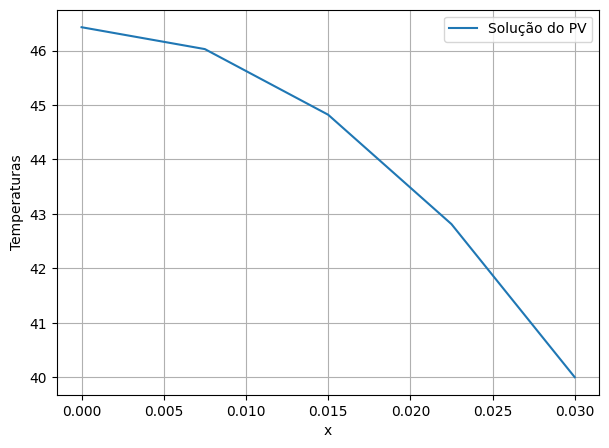

In [56]:
plt.figure(figsize = (7, 5))

plt.plot(x_values, solution_values, "-", label = "Solução do PV")

plt.grid()
plt.legend(loc = "best")


plt.xlabel("x")
plt.ylabel("Temperaturas")

plt.show()